CERINTA: 

Avem un set de date în care dorim să prezicem veniturile lunare ale unei persoane în funcție de numărul de ani de experiență profesională. Datele conțin informații despre experiența profesională x și veniturile observate y. Presupunem că relația dintre acestea este liniară, dar dorim să utilizăm o abordare bayesiană pentru a estima parametrii modelului, luând în considerare incertitudinea asociată.

a) Generați 100 de observații, cu numărul de ani de experiență între 0 și 20 (aleator), iar venitul lunar folosind un model liniar cu zgomot adăugat.

b) Cu ajutorul PyMC, estimați parametrii folosind un model de regresie liniară Bayesiană. Corespund aceștia cu cei aleși de voi la punctul a)?

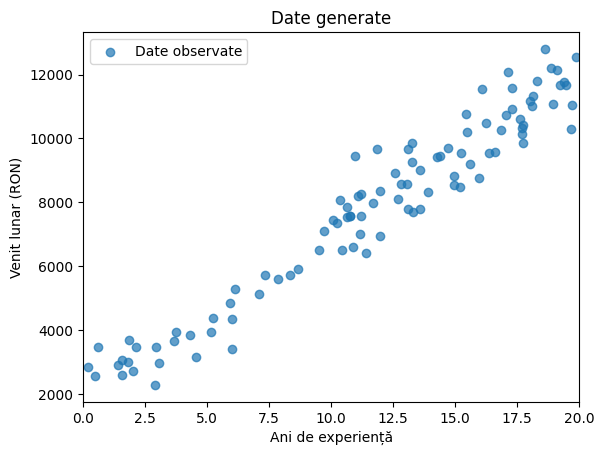

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.


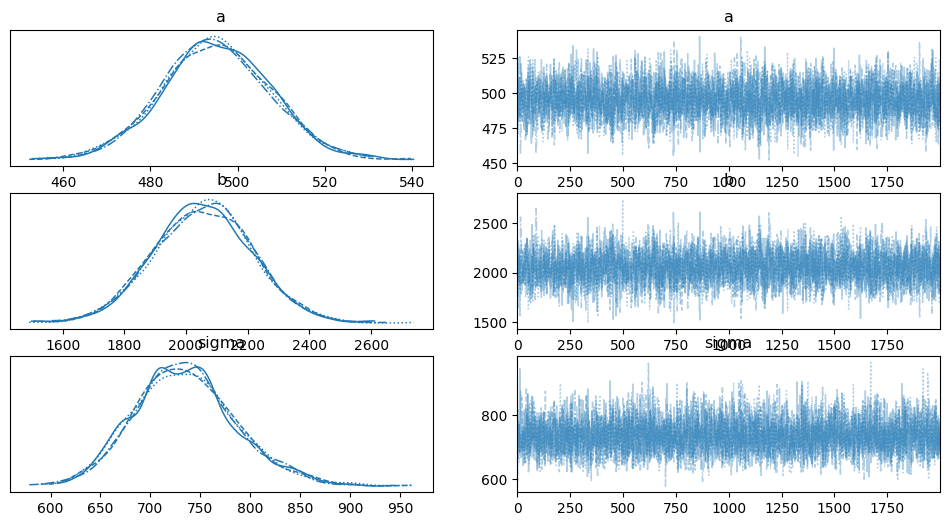

           mean       sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
a       495.042   12.367   470.745    519.490      0.209    0.148    3502.0   
b      2055.305  158.825  1754.038   2375.242      2.667    1.890    3545.0   
sigma   734.926   50.937   639.449    840.790      0.736    0.520    4782.0   

       ess_tail  r_hat  
a        4069.0    1.0  
b        3895.0    1.0  
sigma    4508.0    1.0  


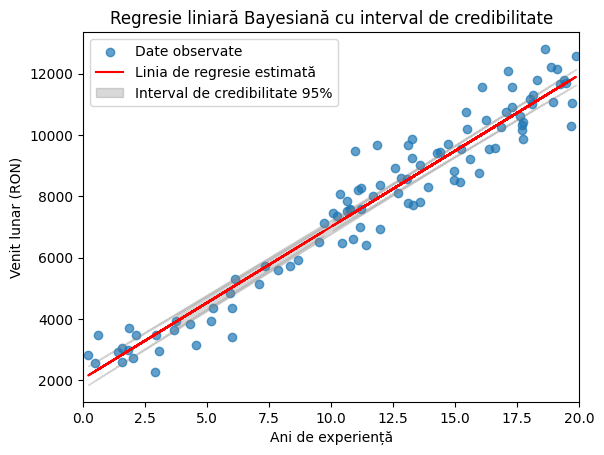

In [26]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

np.random.seed(42)

n_observatii = 100
x = np.concatenate([
    np.random.uniform(0, 10, int(0.3 * n_observatii)),
    np.random.uniform(10, 20, int(0.7 * n_observatii))
])

a_adev = 500
b_adev = 2000
zgomot = np.random.normal(0, 800, n_observatii)

y = a_adev * x + b_adev + zgomot

plt.scatter(x, y, alpha=0.7, label="Date observate")
plt.xlabel("Ani de experiență")
plt.ylabel("Venit lunar (RON)")
plt.title("Date generate")
plt.xlim(0, 20)
plt.legend()
plt.show()

with pm.Model() as model:
    a = pm.Normal("a", mu=0, sigma=100)
    b = pm.Normal("b", mu=2000, sigma=500)
    sigma = pm.HalfNormal("sigma", sigma=500)
    y_est = a * x + b
    y_obs = pm.Normal("y_obs", mu=y_est, sigma=sigma, observed=y)
    trace = pm.sample(2000, return_inferencedata=True, progressbar=True)

az.plot_trace(trace)
plt.show()

posterior_summary = az.summary(trace, hdi_prob=0.95)
print(posterior_summary)

a_samples = trace.posterior["a"].values.flatten()
b_samples = trace.posterior["b"].values.flatten()

y_samples = np.array([a_sample * x + b_sample for a_sample, b_sample in zip(a_samples, b_samples)])

y_lower = np.percentile(y_samples, 2.5, axis=0)
y_upper = np.percentile(y_samples, 97.5, axis=0)

plt.scatter(x, y, alpha=0.7, label="Date observate")
plt.plot(x, y_samples.mean(axis=0), color="red", label="Linia de regresie estimată")
plt.fill_between(x, y_lower, y_upper, color="gray", alpha=0.3, label="Interval de credibilitate 95%")
plt.xlabel("Ani de experiență")
plt.ylabel("Venit lunar (RON)")
plt.title("Regresie liniară Bayesiană cu interval de credibilitate")
plt.xlim(0, 20)
plt.legend()
plt.show()
